In [1]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [60]:
https://www.booli.se/slutpriser/innanfor+tullarna/883816/?page=2

SyntaxError: invalid syntax (<ipython-input-60-d87db9a2cd6b>, line 1)

In [3]:
urlNum = input('Klistra in URL ')

Klistra in URL https://www.booli.se/slutpriser/innanfor+tullarna/883816/?page=2


In [64]:

url = urlNum[:-1]

URLS = []

for uni_url in range(1,1000):
    str_uniNum = str(uni_url)
    uniqueURL = url + str_uniNum
    URLS.append(uniqueURL)

In [65]:
x = 0

adress = []
storlek = []
typ = []
pris = []
prissq = []
date = []
budpremie = []
latitude = []
longitude = []

for objektlista in URLS:
    
    page_link = URLS[x]
    page_response = requests.get(page_link, timeout=5)
    page_content = BeautifulSoup(page_response.content, "html.parser")
    objekt = page_content.find_all(class_='search-list')[0]
    
    
    for objekt_info in range(0,36):
        
        fetch_object = objekt.find_all(class_='search-list__item')[objekt_info]

        obj_budpremie = fetch_object.find_all(class_='search-list__column search-list__column--price-change')[0].text
        obj_budpremie = obj_budpremie[2:]
        
        info_a = fetch_object.find_all(class_='search-list__column search-list__column--info-1')[0]
        info_b = fetch_object.find_all(class_='search-list__column search-list__column--info-2')[0]
        
        lat = fetch_object.find_all(class_='search-list__link')
        lat = str(lat)
        obj_lat = lat[45:55]
        #obj_lat = float(obj_lat)

        lng = fetch_object.find_all(class_='search-list__link')
        lng = str(lng)
        obj_lng = lng[74:84]
        #obj_lng = float(obj_lng)
        
        
        obj_adress = info_a.find_all(class_='search-list__row')[0].text
        obj_storlek = info_a.find_all(class_='search-list__row')[1].text
        obj_typ = info_a.find_all(class_='search-list__row')[2].text
        obj_pris = info_b.find_all(class_='search-list__row')[0].text
        obj_prissq = info_b.find_all(class_='search-list__row')[1].text
        obj_date = info_b.find_all(class_='search-list__row')[2].text

        adress.append(obj_adress)
        storlek.append(obj_storlek)
        typ.append(obj_typ)
        pris.append(obj_pris)
        prissq.append(obj_prissq)
        date.append(obj_date)
        budpremie.append(obj_budpremie)
        latitude.append(obj_lat)
        longitude.append(obj_lng)
        
    x = x+1


In [66]:
import pandas as pd
df = pd.DataFrame({'adress': adress,
                       'storlek': storlek,
                       'typ': typ,
                       'pris': pris,
                       'prissq': prissq,
                        'date': date,
                        'budpremie': budpremie,
                        'latitude': latitude,
                        'longitude': longitude
})

In [67]:
df.head()

,adress,storlek,typ,pris,prissq,date,budpremie,latitude,longitude
0,Katarina Bangata 61,"2 rum, 33 m²","Lägenhet, Södermalm Sofia",2 900 000 kr,87 879 kr/m²,22 mar 2019,"+5,5%",59.3093223,18.0875301
1,Tjärhovsgatan 10,"2 rum, 57 m²","Lägenhet, Södermalm Katarina",4 650 000 kr,81 579 kr/m²,22 mar 2019,"-1,1%",59.3148800,18.0752456
2,Södra Agnegatan 26,"2 rum, 65 m²","Lägenhet, Kungsholmen",5 850 000 kr,90 000 kr/m²,22 feb 2019,"+7,3%",59.3296753,18.0418338
3,Valhallavägen 67,"1 rum, 28 m²","Lägenhet, Östermalm",2 650 000 kr,94 643 kr/m²,22 mar 2019,"+0,0%",59.3462302,18.0686001
4,Norra Stationsgatan 117,"3 rum, 63 m²","Lägenhet, Vasastan",4 450 000 kr,70 635 kr/m²,19 mar 2019,"+3,6%",59.3438301,18.0286712


In [68]:
df['husnummer'] = df['adress'].replace('\D','',regex=True)
df['adress'] = df.adress.replace('\D$','',regex=True)
df['adress'] = df.adress.replace('\d','',regex=True)
df['rum'] = df.storlek.str.extract(r'(^\d+)')

df['kvm'] = df.storlek.str.extract(r'( \d+)')
df['kvm'] = df['kvm'].replace(' ','',regex=True)

df['area'] = df.typ.str.extract(r'( \D+)')
df['area'] = df['area'].replace('^ ','',regex=True)

df['typ'] = df.typ.replace(r'(, \D+)','',regex=True)

df['prissq'] = df.prissq.replace(' ','',regex=True)
df['prissq'] = df['prissq'].replace(r'(\D+)','',regex=True)

df['budgivning'] = df.budpremie.str.extract(r'(\D+)')
df['budgivning'] = df['budgivning'].replace('+','up')
df['budgivning'] = df['budgivning'].replace('-','down')

df['budpremie'] = df['budpremie'].replace(',','.',regex=True)
df['budpremie'] = df['budpremie'].replace('\+|-|%','',regex=True)

df['pris'] = df['pris'].replace(' ','',regex=True)
df['pris'] = df['pris'].replace('kr','',regex=True)

df['day'] = df['date'].str.extract(r'(^\d+ )')
df['day'] = df['day'].replace(' ','')
df['month'] = df['date'].replace('(^\d+)','', regex=True)
df['month'] = df['month'].replace('(\d+$)','', regex=True)
df['year'] = df['date'].str.extract(r'(\d+$)')


df = df[['year','month','day','area','typ','adress','husnummer','kvm','rum',
    'pris','prissq','budgivning','budpremie','latitude','longitude']]

df.columns = ['year', 'month', 'day', 'area', 'type', 'street', 'street_num', 'sq_m',
       'rooms', 'price', 'price_sq', 'bid', 'bid_percent', 'latitude',
       'longitude']

df.fillna(0,inplace=True)

In [69]:
#Dropping rows that has invalid bids
df = df.drop(df[(df['bid'] != 'up') & (df['bid'] != 'down')].index)

In [70]:
#Drop all rows where sq_m is equal to 0

df = df.drop(df[df['sq_m'] ==0].index)
df = df.drop(df[df.price_sq < '10'].index)

In [71]:
df.sq_m = df.sq_m.astype(int)
df.rooms = df.rooms.astype(int)
df.price = df.price.astype(int)
df.price_sq = df.price_sq.astype(int)
df.bid_percent = df.bid_percent.astype(float)

df['thn_price_sq'] = df.price_sq//1000*1000

In [72]:
#Create unique_id with a combo of all data in table

df['unique_id'] = df['latitude'].str.replace('.','').str.extract(r'(\d+)') + df['longitude'].str.replace('.','').str.extract(r'(\d+)')
df['unique_id'] = df['unique_id'] + df['day'] + df['year'] + df['street_num'] + df['bid_percent'].astype(int).astype(str) + df['price'].astype(str) + df['sq_m'].astype(str) + df['rooms'].astype(str) + df['rooms'].astype(str)
df['unique_id'] = df['unique_id'].str.replace(' ','')

In [73]:
#Drop duplicates and keep first row

df = df.drop_duplicates(subset='unique_id', keep='first')

In [74]:

jan = df[df['month'].str.contains('jan',regex=True)]
jan['month'] = '01'

feb = df[df['month'].str.contains('feb',regex=True)]
feb['month'] = '02'

mar = df[df['month'].str.contains('mar',regex=True)]
mar['month'] = '03'

apr = df[df['month'].str.contains('apr',regex=True)]
apr['month'] = '04'

maj = df[df['month'].str.contains('maj',regex=True)]
maj['month'] = '05'

jun = df[df['month'].str.contains('jun',regex=True)]
jun['month'] = '06'

jul = df[df['month'].str.contains('jul',regex=True)]
jul['month'] = '07'

aug = df[df['month'].str.contains('aug',regex=True)]
aug['month'] = '08'

sep = df[df['month'].str.contains('sep',regex=True)]
sep['month'] = '09'

okt = df[df['month'].str.contains('okt',regex=True)]
okt['month'] = '10'

nov = df[df['month'].str.contains('nov',regex=True)]
nov['month'] = '11'

dec = df[df['month'].str.contains('dec',regex=True)]
dec['month'] = '12'


frames = [jan,feb,mar,apr,maj,jun,jul,aug,sep,okt,nov,dec]
df = pd.concat(frames)

df.month = df.month.astype(int)
df.year = df.year.astype(int)
df['yyyymm'] = df[['year','month']].dot([100,1])



d10 = df[(df['sq_m'] >= 1) & (df['sq_m'] < 10)]
d10['sq_mR'] = '1_9'

d20 = df[(df['sq_m'] >= 10) & (df['sq_m'] < 20)]
d20['sq_mR'] = '10_19'

d30 = df[(df['sq_m'] >= 20) & (df['sq_m'] < 30)]
d30['sq_mR'] = '20_29'

d40 = df[(df['sq_m'] >= 30) & (df['sq_m'] < 40)]
d40['sq_mR'] = '30_39'

d50 = df[(df['sq_m'] >= 40) & (df['sq_m'] < 50)]
d50['sq_mR'] = '40_49'

d60 = df[(df['sq_m'] >= 50) & (df['sq_m'] < 60)]
d60['sq_mR'] = '50_59'

d70 = df[(df['sq_m'] >= 60) & (df['sq_m'] < 70)]
d70['sq_mR'] = '60_69'

d80 = df[(df['sq_m'] >= 70) & (df['sq_m'] < 80)]
d80['sq_mR'] = '70_79'

d90 = df[(df['sq_m'] >= 80) & (df['sq_m'] < 90)]
d90['sq_mR'] = '80_89'

d100 = df[(df['sq_m'] >= 90) & (df['sq_m'] < 100)]
d100['sq_mR'] = '90_99'

d110 = df[(df['sq_m'] >= 100) & (df['sq_m'] < 110)]
d110['sq_mR'] = '100_109'

d120 = df[(df['sq_m'] >= 110) & (df['sq_m'] < 120)]
d120['sq_mR'] = '110_119'

d130 = df[(df['sq_m'] >= 120) & (df['sq_m'] < 130)]
d130['sq_mR'] = '120_129'

d140 = df[(df['sq_m'] >= 130) & (df['sq_m'] < 140)]
d140['sq_mR'] = '130_139'

d150 = df[(df['sq_m'] >= 140) & (df['sq_m'] < 150)]
d150['sq_mR'] = '140_149'

d160 = df[(df['sq_m'] >= 150) & (df['sq_m'] < 160)]
d160['sq_mR'] = '150_159'

d170 = df[(df['sq_m'] >= 160) & (df['sq_m'] < 170)]
d170['sq_mR'] = '160_169'

d180 = df[(df['sq_m'] >= 170) & (df['sq_m'] < 180)]
d150['sq_mR'] = '140_149'

d190 = df[(df['sq_m'] >= 180) & (df['sq_m'] < 190)]
d160['sq_mR'] = '150_159'

d200 = df[(df['sq_m'] >= 190) & (df['sq_m'] < 200)]
d170['sq_mR'] = '160_169'

frames = [d200,d190,d180,d170,d160,d150,d140,d130,d120,d110,d100,d90,d80,d70,d60,d50,d40,d30,d20,d10]
df2 = pd.concat(frames)


In [75]:
df2.head()

,area,bid,bid_percent,day,latitude,longitude,month,price,price_sq,rooms,sq_m,sq_mR,street,street_num,thn_price_sq,type,unique_id,year,yyyymm
24958,Östermalm,up,13.4,28,59.3401009,18.0697708,1,17300000,90576,6,191,NaN,Engelbrektsgatan,19,90000,Lägenhet,59340100918069770828201619131730000019166,2016,201601
1191,Östermalm,up,0.0,22,59.3415959,18.0795288,2,17950000,93979,6,191,NaN,Östermalmsgatan,61,93000,Lägenhet,5934159591807952882220196101795000019166,2019,201902
8687,Östermalm,down,7.1,23,59.3397968,"8.0676217""",2,19500000,97990,6,199,NaN,Birger Jarlsgatan,42,97000,Lägenhet,593397968806762172320184271950000019966,2018,201802
16641,Kungsholmen,down,10.8,1,59.3290008,18.0438147,3,14500000,73232,6,198,NaN,Hantverkargatan,22,73000,Lägenhet,5932900081804381471201722101450000019866,2017,201703
7294,Vasastan,down,7.0,27,"59.338906""",".0607182""",4,12000000,61538,6,195,NaN,Sveavägen,62,61000,Lägenhet,5933890606071822720186271200000019566,2018,201804


In [76]:
df2 = df2[['year', 'yyyymm', 'month', 'day', 'unique_id', 'type', 'area', 'latitude', 'longitude','street', 'street_num',
     'rooms','sq_m','sq_mR', 'bid', 'bid_percent', 'thn_price_sq','price', 'price_sq']]

In [77]:
df2

,year,yyyymm,month,day,unique_id,type,area,latitude,longitude,street,street_num,rooms,sq_m,sq_mR,bid,bid_percent,thn_price_sq,price,price_sq
24958,2016,201601,1,28,59340100918069770828201619131730000019166,Lägenhet,Östermalm,59.3401009,18.0697708,Engelbrektsgatan,19,6,191,NaN,up,13.4,90000,17300000,90576
1191,2019,201902,2,22,5934159591807952882220196101795000019166,Lägenhet,Östermalm,59.3415959,18.0795288,Östermalmsgatan,61,6,191,NaN,up,0.0,93000,17950000,93979
8687,2018,201802,2,23,593397968806762172320184271950000019966,Lägenhet,Östermalm,59.3397968,"8.0676217""",Birger Jarlsgatan,42,6,199,NaN,down,7.1,97000,19500000,97990
16641,2017,201703,3,1,5932900081804381471201722101450000019866,Lägenhet,Kungsholmen,59.3290008,18.0438147,Hantverkargatan,22,6,198,NaN,down,10.8,73000,14500000,73232
7294,2018,201804,4,27,5933890606071822720186271200000019566,Lägenhet,Vasastan,"59.338906""",".0607182""",Sveavägen,62,6,195,NaN,down,7.0,61000,12000000,61538
15754,2017,201704,4,4,59347025180466856420175101965000019066,Lägenhet,Vasastan,59.3470251,"8.0466856""",Norrtullsgatan,51,6,190,NaN,down,0.8,103000,19650000,103421
15777,2017,201704,4,3,593161498180694906320174901150000019244,Lägenhet,Södermalm,59.3161498,18.0694906,Högbergsgatan,49,4,192,NaN,up,0.0,59000,11500000,59896
23123,2016,201604,4,15,593379389180637121152016181390000019766,Lägenhet,Norrmalm,59.3379389,18.0637121,Döbelnsgatan,1,6,197,NaN,down,8.9,70000,13900000,70558
30900,2015,201504,4,5,593234480180697606520153441200000019044,Lägenhet,Gamla Stan,59.3234480,18.0697606,Tyska Brinken,34,4,190,NaN,up,4.3,63000,12000000,63158
3944,2018,201805,5,4,593323354808735044201860121985000019166,Lägenhet,Östermalm,59.3323354,"8.0873504""",Riddargatan,60,6,191,NaN,down,12.9,103000,19850000,103927


In [78]:
df2.to_csv('bigTable.csv')

1. Hur ser marknaden ut just nu för detta området?
2. Hur vill du bo, fyll i dina uppgifter?
3. Hur mycket kan jag förvänta mig att lägenheten går upp i en budgivning?
4. Är detta ett bra kap?

## Är objektet jag hittat ett kap?

- Besökare får fylla i uppgifter om bostaden hen hittat
- Skapa ett intervall på +/- 5kvm och pris på +/- 200.000

- Hur ser historiska köp ut på den gatan du letar? (låg quantile, medel, hög quantile), 
- Denna gatan är x dyraste gatan i området enligt medelvärde
- Hur förhåller sig bostadens utgångspris till historisk data, om priset är högst skriv att det är högst

## Hur mycket kan jag förvänta mig att lägenheten går upp i en budgivning?

- Besökare får fylla i uppgifter om bostaden hen hittat
- Skapa ett intervall på +/- 5kvm och pris på +/- 200.000

- Hur ser budpremien ut för kvartal genom åren?
- Hur ser budpremien ut för de senaste månaderna?

## Hur ser det ut för det segment som jag just nu letar i?

In [37]:
df.head()

,year,month,day,area,type,street,street_num,sq_m,rooms,price,price_sq,bid,bid_percent,latitude,longitude,thn_price_sq,unique_id,yyyymm
48,2019,1,30,Vasastan,Lägenhet,Sankt Eriksgatan,81,38,1,3925000,103289,up,12.9,59.3402507,18.0367631,103000,593402507180367631302019811239250003811,201901
161,2019,1,30,Gärdet,Lägenhet,Olaus Petrigatan,4,84,3,6995000,83274,up,0.0,59.3454999,18.0903689,83000,5934549991809036893020194069950008433,201901
179,2019,1,17,Östermalm,Lägenhet,Linnégatan,92,64,3,5900000,92188,down,5.6,59.3337509,8.09658256,92000,59333750980965825617201992559000006433,201901
207,2019,1,22,Kungsholmen,Lägenhet,Kungsbro Strand,25,83,4,6270000,76000,up,1.1,59.3311691,18.0502510,76000,59331169118050251022201925162700008344,201901
208,2019,1,24,Kungsholmen,Lägenhet,Baltzar von Platens gata,5,36,1,3410000,94722,up,13.9,59.3288663,18.0314752,94000,59328866318031475224201951334100003611,201901


In [33]:
min_wish_rooms = input('Hur många rum vill du bo minst bo i? ')
min_wish_sq_m = input('Minst antal kvadrat? ')
max_wish_budget = input('Vad är din max budget? ')


#Set inputs to int
min_wish_rooms = int(min_wish_rooms)
min_wish_sq_m = int(min_wish_sq_m)
max_wish_budget = int(max_wish_budget)

#Getting table from needs
wish_table = df[(df['rooms'] >= min_wish_rooms) & (df['sq_m'] >min_wish_sq_m) & (df['price']<max_wish_budget)]

Hur många rum vill du bo minst bo i? 2
Minst antal kvadrat? 50
Vad är din max budget? 6000000


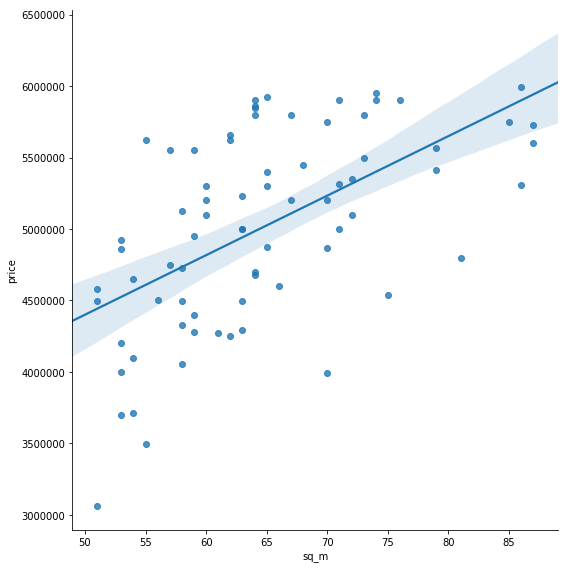

In [34]:
sns.lmplot(data=wish_table, x='sq_m', y='price', height=8)

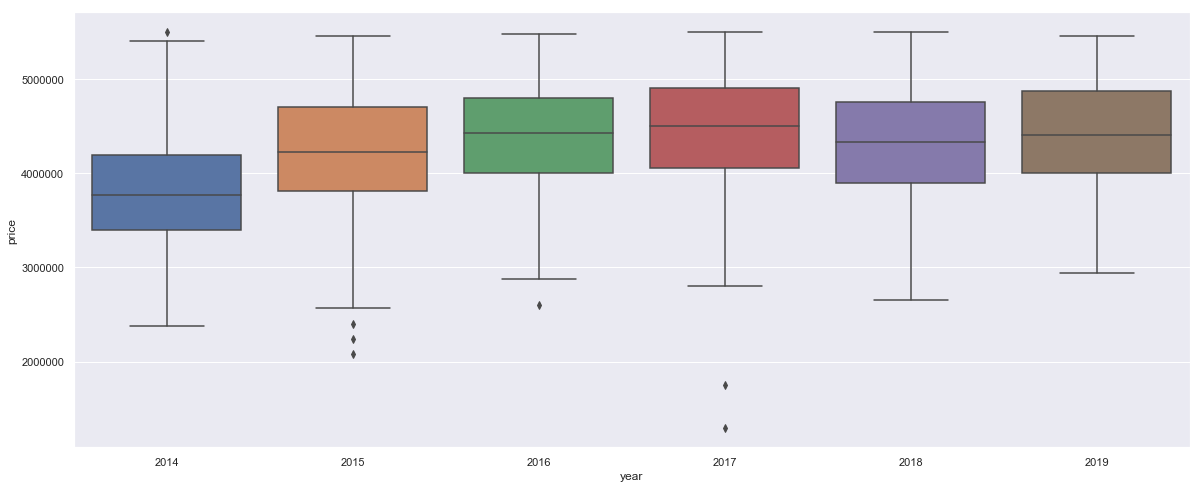

In [202]:
sns.set(rc={'figure.figsize':(20,8)})
sns.boxplot(data=wish_table, x='year', y='price')